# Real Time Location System

### Predicting Location with K- Nearest Neighbor

#### Team: 
- Bin Yu
- Nuoya Rezsonya
- Yejur SIngh Kunwar
- Iram Bakhtiar

### Introduction

Real-time locating systems(RTLS) are utilized to identify and locate objects or people in real time, usually indoor. In most RTLS, a wireless tag will be attached to the desire objects so that fixed reference points could receive the signals from the tags to determine the locations. In real world, this technology has been used in assembly line to locate the automobiles, hospitals to locate medical equipments and warehouses to locate the products etc. 

RTLS uses access points to measure the strength of signals from a hand held device and then predict the hand held device's location using K-NN algorithm. The way RTLS works could be broken down into three steps. Before implementing this application, a reference set of data is required. This data contains the measurments of the signal strength between a hand-held device and fixed access points. It is also known as offline data which you can consider them as training data. With this data, we can establish a model for the location of the device as a function of the strength of signals between the device and each access points. Then we use the model to predict the location of a tag when the location is unknown.

In the case study from Nolan and Lang(!!!cite this), the offline data has been provided which has 6 access points within a hallway on a specific floor at University of Mannheim and 166 points with 1 meter from each other as tags. 


<img src="FloorPlan.png" style="height:400px"/>

This offline data has been used to predict the locations of a device that the location is unknown. Predictions have been tested on the testing data which is the "online" data. In "online" data, 60 locations which are not included in the previous 166 points and orientation have been chosen randomly. A total of 110 singal have been measured from them to each access point. "Online" data is used to determine the performance of the RTLS model. 

In our case study, we will conduct a more thorough data analysis into these two MAC addresses including determining locations by using data corresponding to both MAC addresses. Then answer the following questions including:

- Which of these two MAC addresses should be used and which should not be used for RTLS? 
- Which MAC address yields the best prediction of location?  
- Does using data for both MAC addresses simultaneously yield more, or less, accurate prediction of location? (Note: this portion is derived from Exercise Q.9 in Nolan and Lang.)

- While k-nearest neighbors has proven to be a good approach to determining location, alternate approaches have been proposed.  One simple alternative approach is to use weights on the received signal strength, where the weight is inversely proportional to the “distance” from the test observation.  This allows for the “nearest” points to have a greater contribution to the k-nearest neighbor location calculation than the points that are “further” away.  

- Implement this alternative prediction method.  
- For what range of values of weights are you able to obtain better prediction values than for the unweighted k-nearest neighbor approach? Use calcError() to compare this approach to the simple average.

- Case Study from: Data Science in R: Nolan,Temple,Lang (Ch 1)
- Source code: http://rdatasciencecases.org/code.html
- Dataset: http://rdatasciencecases.org/Data.html

### Methodology (Iram if you have anything in mind, please add more)

This notebook includes data exploration, data preparation, data visualization and lastly an improved K-NN model(this can be changed) to more accurately predict the location of a hand held device that the location is unknown.

The following code is the modification of the example code provided from Chapter 1 of Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving by Deborah Nolan and Duncan Temple Lang. The source code can be found at http://rdatasciencecases.org/code.html and the dataset is at http://rdatasciencecases.org/Data.html.

### DATA EXPLORATION

In this notebook, we will be using the offline data provided by the book, Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving by Deborah Nolan and Duncan Temple Lang. This offline data will be used as the training data to build the prediction model. It has a total of 151,392 rows in the file and 5,312 rows are comments. The total 146,080 data rows will be used in our data analysis. This is matching with our expetation of the number of line in the file (166 locations x 8 angles x 110 recordings).

### Data Import

The data are not tablur data format that we can directly import into data frame using read.table(). The main data elements are separated by semicolons. And each field has the label and "=" followed by a value. The last part of the record is really a matrix contains 4 columns: MAC, orientation, channel frequency, mode. In the first record, there are 8 MACs has mode 3(access point) and 2 MAcs with mode 1(Adhoc mode). 

The following is table of Units of Measurement(from Nolan and Lang Book,page 7 Table 1.1: Units of Measurement)

<p align="left">Variables              </p> |<p align="left">Units</p>
:-------------:|:-----------------------------------------
<p align="left">t</p> | <p align="left">timestamp in milliseconds since midnight, January 1, 1970 UTC </p>
<p align="left">id</p> | <p align="left">MAC address of the scanning device</p>
<p align="left">pos</p> | <p align="left">the physical coordinate of the scanning device</p>
<p align="left">degree</p> | <p align="left">orientation of the user carrying the scanning device in degrees</p> 
<p align="left">MAC</p> | <p align="left">MAC address of a responding peer (e.g., an accesspoint or a device in adhoc mode) with the corresponding values for signal strength in dBm
 <p align="left"></p> | <p align="left"> (Decibel-milliwatts), the channel frequency and its mode (access point = 3, device in adhoc mode = 1)


In [1]:
# Installing and importing necessary libraries
library(lattice)
# install.packages('fields')  #(RUN THIS IF YOU DO NOT HAVE PACKAGE)
# library(fields)

In [2]:
# Importing data from data folder in this environments
options(digits = 2)
txt = readLines("Data/offline.final.trace.txt")

# Prelimniary data exploration for dimensions
print(paste("The total number of lines in offline data =",length(txt)))
# there are comments in the data, figure out amount
print(paste("The number of comments in data =", sum(substr(txt, 1, 1) == "#"))) 
# the actual data lines
print(paste("The actual number of data, non-comment lines =", length(txt) - sum(substr(txt, 1, 1) == "#"))) 

[1] "The total number of lines in offline data = 151392"
[1] "The number of comments in data = 5312"
[1] "The actual number of data, non-comment lines = 146080"


In [3]:
# Take a look at first data row
strsplit(txt[4], ";")[[1]]

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

### Preparing Data For Analysis

Since the data is not structured and we cannot directly imprt the text read through readlines into data frame. We are using strsplit function and using ;=, as token to parse each line. Below function will define the logic we are going to use to import the data.

The following step is to create a function that we could use to creatte matrixes for each line of data in "offline and then merge them into a data frame which we will use for the final analysis.

In [4]:
# Function for data cleaning, iterating over rows
processLine = function(x)
{
    tokens = strsplit(x, "[;=,]")[[1]]
    # ignore the row if it the line doesn't have MAC part.
    if (length(tokens) == 10)
      return(NULL)
    tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
    cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6,
    byrow = TRUE), tmp)
}


We are ignoring all of the comments rows which first character on the line is "#". then call processLine function through lappy. The result is saved into **offline** data frame. The offline data frame has 1,181,628 records and 10 columns.

In [5]:
# get lines strip out the comments with # in the begining
lines = txt[ substr(txt, 1, 1) != "#" ]
# parsing each line and save it in staging table.
tmp = lapply(lines, processLine)

options(error = recover, warn = 1)

tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp),
                        stringsAsFactors = FALSE)
dim(offline)

[1] 1181628      10

Now we are adding headers to the variables and then data type rearrangment is performed here to make sure our variables are in the correct format for the analysis. Up to this point, the data already has numeric variables.

The printed result shows that we have 10 columns in the data frame and variables including time, position X, position Y, signal, and orientation are all converted to numeric variables. 

However, we are not using all rows and columns to do the analysis. If we use the signal strengths as the measurement, we don't need the ad-hoc mode and removed about 203,185 records from the data frame. The field **type** has been removed as well. After the clean up process, we have 978,443 rows and 9 columns in offline data frame.

In [6]:
# Adding header
names(offline) <- c("time", "scanMac", "posX", "posY", "posZ", 
                   "orientation", "mac", "signal", 
                   "channel", "type")
# Numeric varaible field
numVars <- c("time", "posX", "posY", "posZ", 
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)



In [7]:
dim(offline[ offline$type == "1", ])

[1] 203185     10

In [8]:
# only get the category 3 records
offline <- offline[ offline$type == "3", ]
offline <- offline[ , "type" != names(offline) ]
dim(offline)

[1] 978443      9

Now let us check the data types.

In [9]:
# Formatting time and checking data types
offline$rawTime <- offline$time
offline$time <- offline$time/1000
class(offline$time) <- c("POSIXt", "POSIXct")
unlist(lapply(offline, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

Based on the documentation, the time field is measured in number of the milliseconds. However the POSIXt is measured in the seconds. We scaled the time value to seconds. The original time saved into the rawtime field and convert the original time to time1 and time2 fields.

In [10]:
# Currently the table looks like this
head(offline)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.1e+12
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.1e+12
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.1e+12
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.1e+12
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.1e+12
2006-02-10 23:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.1e+12


In [11]:
print("Summary of all numeric variables in dataset")
summary(offline[, numVars])
summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

[1] "Summary of all numeric variables in dataset"


      time                          posX         posY           posZ  
 Min.   :2006-02-10 23:31:58   Min.   : 0   Min.   : 0.0   Min.   :0  
 1st Qu.:2006-02-11 05:21:27   1st Qu.: 2   1st Qu.: 3.0   1st Qu.:0  
 Median :2006-02-11 11:57:58   Median :12   Median : 6.0   Median :0  
 Mean   :2006-02-16 06:57:37   Mean   :14   Mean   : 5.9   Mean   :0  
 3rd Qu.:2006-02-19 06:52:40   3rd Qu.:23   3rd Qu.: 8.0   3rd Qu.:0  
 Max.   :2006-03-09 12:41:10   Max.   :33   Max.   :13.0   Max.   :0  
  orientation      signal   
 Min.   :  0   Min.   :-99  
 1st Qu.: 90   1st Qu.:-69  
 Median :180   Median :-60  
 Mean   :167   Mean   :-62  
 3rd Qu.:270   3rd Qu.:-53  
 Max.   :360   Max.   :-25  

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

We can remove **scanMac** and **posZ** columns as:

* According the summary of the data frame, field **scanMac** only have 1 value 00:02:2D:21:0F:33:978443 which the MAC address from the hand-held device.
* field **posZ** which is the elevation of the hand-held device which is 0. This is due to all of the measurements were taken on one floor of the building.


In [12]:
# remove scanMac, posZ 
offline <- offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

Now the offline data is ready for the analysis.

### Exploring Orientation

[1] "Number of Unique Orientation : 203"
[1] "Empirical CDF of Orientation for the Hand-Held Device"


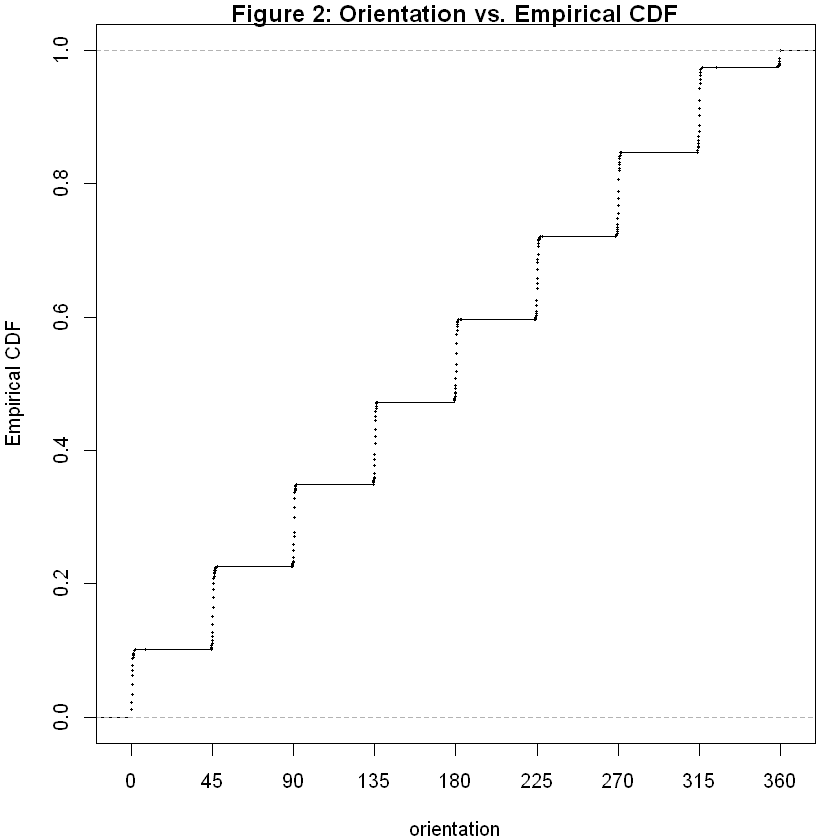

In [13]:
# Length of orientation
# Plotting the distribution of orientation
#Computing an empirical cumulative distribution function, with “ecdf” object.
print(paste("Number of Unique Orientation :",length(unique(offline$orientation))))
print("Empirical CDF of Orientation for the Hand-Held Device")

#pdf(file = "Geo_ECDFOrientation.pdf", width = 10, height = 7)
oldPar <- par(mar = c(4, 4, 1, 1))
plot(ecdf(offline$orientation), pch = 19, cex = 0.3,
     xlim = c(-5, 365), axes = FALSE,
     xlab = "orientation", ylab = "Empirical CDF", main = "Figure 2: Orientation vs. Empirical CDF")
box()
axis(2)
axis(side = 1, at = seq(0, 360, by = 45))
par(oldPar)
#dev.off()


According to the documentation, we should have only have 8 values for the orientation from 0 to 215. However, based on the result above there are 203 distinct orientation values in the data. Above figure shows the distribution of the orientations which around 8 basic orientations that 45 degree apart. Also, 0 orientations is split into 2 groups, 0 and 360. The density plot below also approves the orientation problem with 0 orientation split into 2 groups.

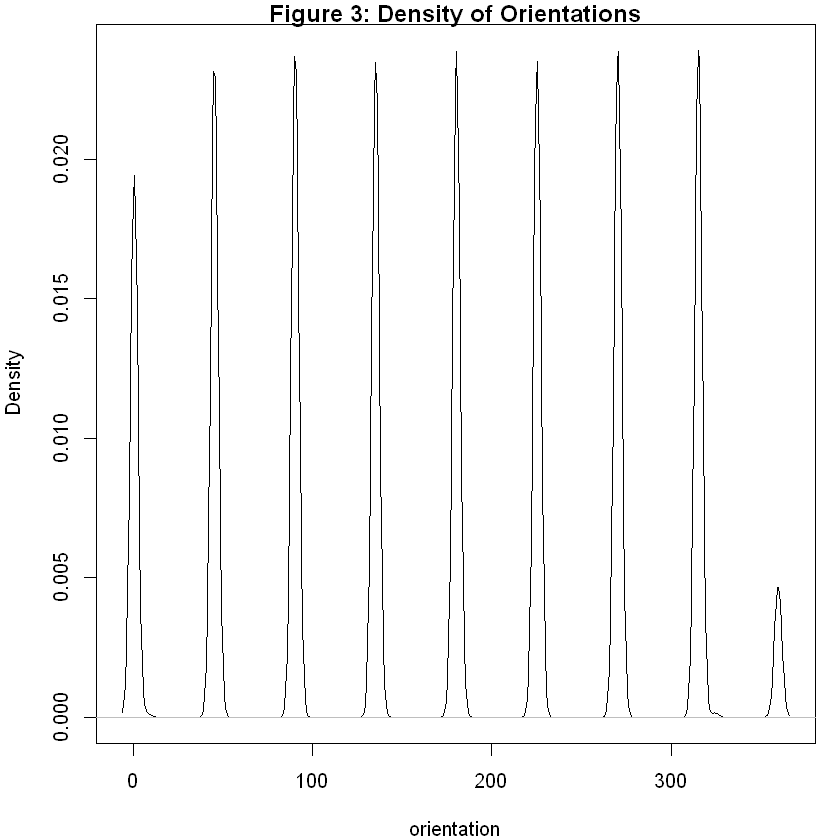

In [14]:
#pdf(file = "Geo_DensityOrientation.pdf", width = 10, height = 5)
oldPar <- par(mar = c(4, 4, 1, 1))
plot(density(offline$orientation, bw = 2), 
 xlab = "orientation", main = "Figure 3: Density of Orientations")
par(oldPar)
#dev.off()

We use the **roundOrientation** function to standarlize the orientation.

In [15]:
roundOrientation <- function(angles) {
  refs <- seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

In [16]:
# round the orientation degree
offline$angle <- roundOrientation(offline$orientation)

After running the round orientation function, we only see 8 angles now.

In [17]:
head(offline)
print(paste("Number of Unique Angle :",length(unique(offline$angle))))

time,posX,posY,orientation,mac,signal,channel,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.1e+12,0


[1] "Number of Unique Angle : 8"


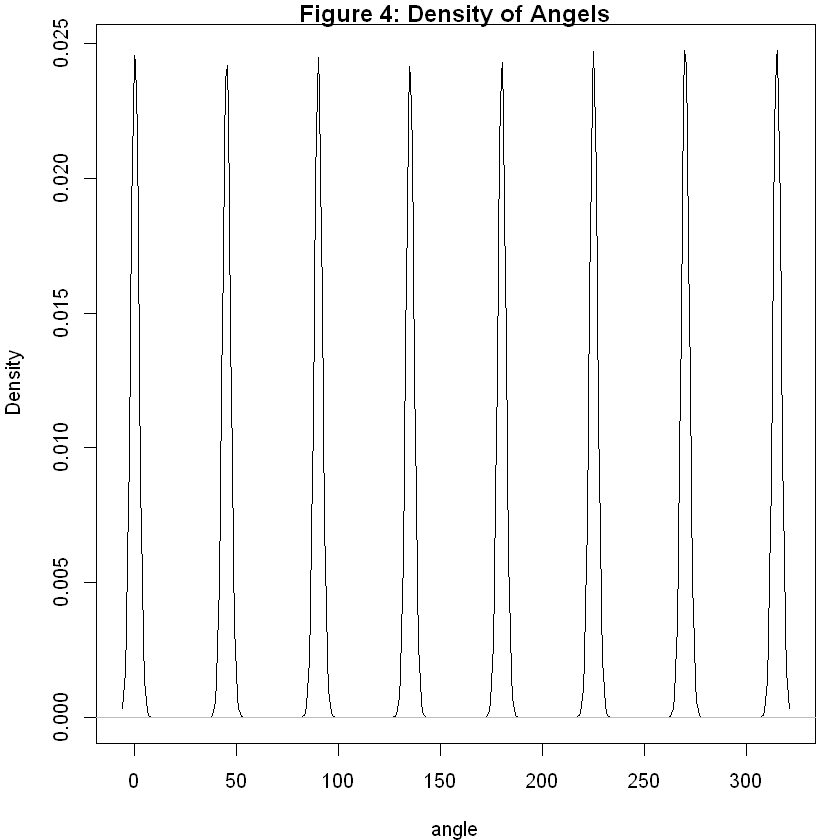

In [18]:

#pdf(file = "Geo_BoxplotAngle.pdf", width = 10)
oldPar <- par(mar = c(4, 4, 1, 1))
plot(density(offline$angle, bw = 2), 
 xlab = "angle", main = "Figure 4: Density of Angels")
par(oldPar)
#dev.off()

### Exploring MAC Addresses

As the result from the code below, there are 12 MAC points in the dataset and this case study from Nolan and Lang had only 6 access points and did analysis on the 6 points. 

The resulting table below shows the access points and their records. There are three points with low number of records comparing to the rest of the points. They are 00:04:0e:5c:23:fc, 00:30:bd:f8:7f:c5 and 00:e0:63:82:8b:a9. We can tell that those points are either not near the testing area or only active for a short time during the measurement process due to the low number of counts. Also, among those points with high counts, 00:0f:a3:39:e0:4b and 00:0f:a3:39:e2:10 may not be among the access points on the map since they have lower number of counts. Then we can see the rest of the MACs are true access points. 

In [19]:
c(length(unique(offline$mac)), length(unique(offline$channel)))

table(offline$mac)

[1] 12  8


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

Now we remove other MACs and only keep MACs from location 1-7. And we list out the channel for each MAC.

In [20]:
subMacs <- names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline <- offline[ offline$mac %in% subMacs, ]


In [21]:
head(offline)

time,posX,posY,orientation,mac,signal,channel,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.1e+12,0


In [22]:
# list the channel for each MAC
macChannel <- with(offline, table(mac, channel))
apply(macChannel, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

This above shows that MAC and channel is one to one relationship. Then we can eliminate **channel** from **offline** data frame.

In [23]:
offline <- offline[ , "channel" != names(offline)]
head(offline)

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.1e+12,0


### Position of the Hand-Held Device

In **offline** data frame we see posX and postY fields, we can allocate the hand-device by (x,y). We can get the location and plot them together then we can see the signles in each location.

In [24]:

#
locDF <- with(offline, 
             by(offline, list(posX, posY), function(x) x))
length(locDF)


[1] 476

In [25]:
# number of null 
sum(sapply(locDF, is.null))
# remove Null
locDF <- locDF[ !sapply(locDF, is.null) ]

length(locDF)

[1] 310

[1] 166

There are 476 locations in the data frame, 310 of them are null and only 166 of them has the valid location.

In [26]:
# Get the counts for each location.
locCounts <- sapply(locDF, nrow)

locCounts <- sapply(locDF, 
                   function(df) 
                     c(df[1, c("posX", "posY")], count = nrow(df)))

class(locCounts)

dim(locCounts)

locCounts[ , 1:8]

[1] "matrix"

[1]   3 166

posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


From plot below, we see that there are roughly 5,500 records (8 Orientations x 110 replications x 7accesspoints) at each position. It is roughly the same number of signals detected at each location.

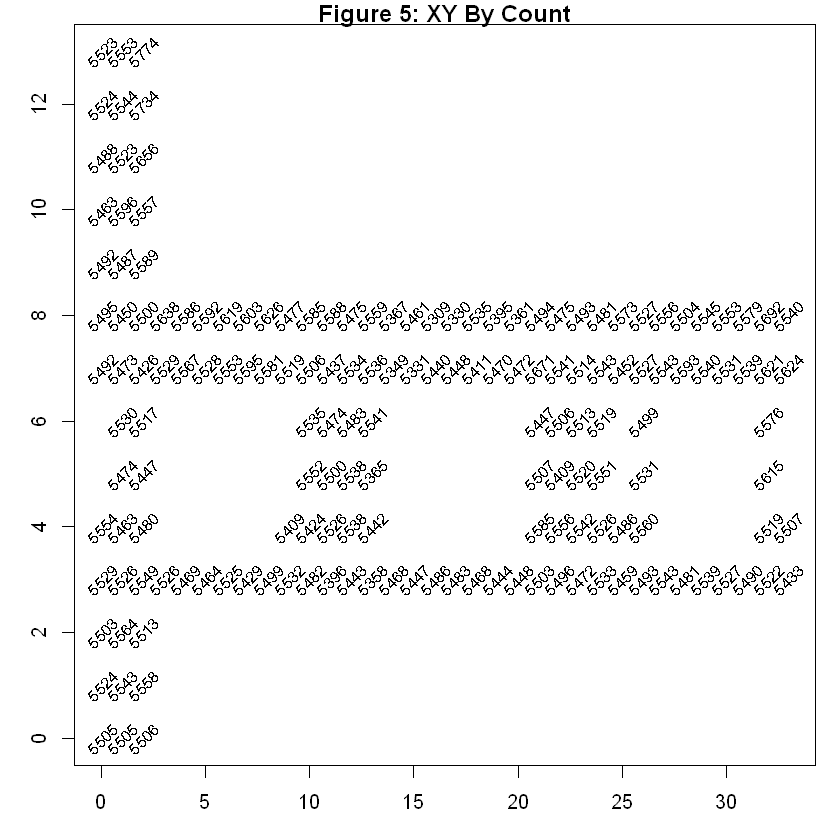

In [27]:
#pdf(file = "Geo_XYByCount.pdf", width = 10)
oldPar <- par(mar = c(3.1, 3.1, 1, 1))

locCounts <- t(locCounts)
plot(locCounts, type = "n", xlab = "", ylab = "", main= "Figure 5: XY By Count")
text(locCounts, labels = locCounts[,3], cex = .8, srt = 45)

par(oldPar)
#dev.off()

### Create a readData Function

Now we know what access points to use, we can use the readData function below to make sure that we can download the correct data and make the above steps more smooth and more efficient.

In [28]:
       
# read data
readData <- 
  function(filename = 'Data/offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt <- readLines(filename)
    lines <- txt[ substr(txt, 1, 1) != "#" ]
    tmp <- lapply(lines, processLine)
    offline <- as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline) <- c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline <- offline[ offline$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars <- c("scanMac", "posZ", "channel", "type")
    offline <- offline[ , !( names(offline) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline <- offline[ offline$mac %in% subMacs, ]
    
    # convert numeric values
    numVars <- c("time", "posX", "posY", "orientation", "signal")
    offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

    # convert time to POSIX
    offline$rawTime <- offline$time
    offline$time <- offline$time/1000
    class(offline$time) <- c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline$angle <- roundOrientation(offline$orientation)
      
    return(offline)
  }




In [29]:
# call function to read the data from file
offlineRedo <- readData()

The following line is just to confirm that offline populated manually is the same as the function returns. 

In [30]:
identical(offline, offlineRedo)

[1] TRUE

In [31]:
library(codetools)
findGlobals(readData, merge = FALSE)$variables

[1] "as.numeric"  "processLine"

In [32]:
head(offline)

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.1e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.1e+12,0


### Singnal Strength Analysis

For the case study for this chapter, Nolan and Lang provided a basic k-nearest neighbors approach to determine the location with an assumption that the floor plan for the building is accurate, see the Figure 1.1 above. The floor plan has six access points but the data contains seven access points with roughly the expected number of signals. 

In the analysis presented in Nolan and Lang, a decision was made to keep the access point with MAC address 00:0f:a3:39:e1:c0 and to eliminate the data corresponding to MAC address 00:0f:a3:39:dd:cd. To find out which point is better predicting the "online" data and which one we should keep, we will need to see what is the whole picture behind these two points before we decide which we are going to use in our final model.

In this part we are going to answer the following two questions through visualization comparison:

* Question 1 : Which of these two MAC addresses should be used and which should not be used for RTLS?

* Question 2 : Which MAC address yields the best prediction of location?

We have two kinds of visualization below to tell how these two MACs are different from each other. One is the visualization of Signal Strength at Different Orientations for Access Points and the other is the Strength Distribution. The reason for this comparison is that we want to see how they vary in terms of strength distribution and the strength at different orientations.In Figure 6.1 below, we have dropped the access point 00:0f:a3:39:dd:cd. And in Figure 6.2 below, we dropped the other. Figure 7.1 and Figure 7.2 follow the same order. 

By Comparing these two points, we can see that they are similar in distribution but they are different in strength. Figure 6.1 and 6.2 give us an idea how they are different in terms of strength. We do prefer a smaller absolute value of the signal strength because it indicates a stronger signal being received. The dropped access point 00:0f:a3:39:dd:cd has a higher absoluter value of signal strength when being compared to the other point. This is the keypoint for us to determine that 00:0f:a3:39:e1:c0 should be kept for the RTLS.


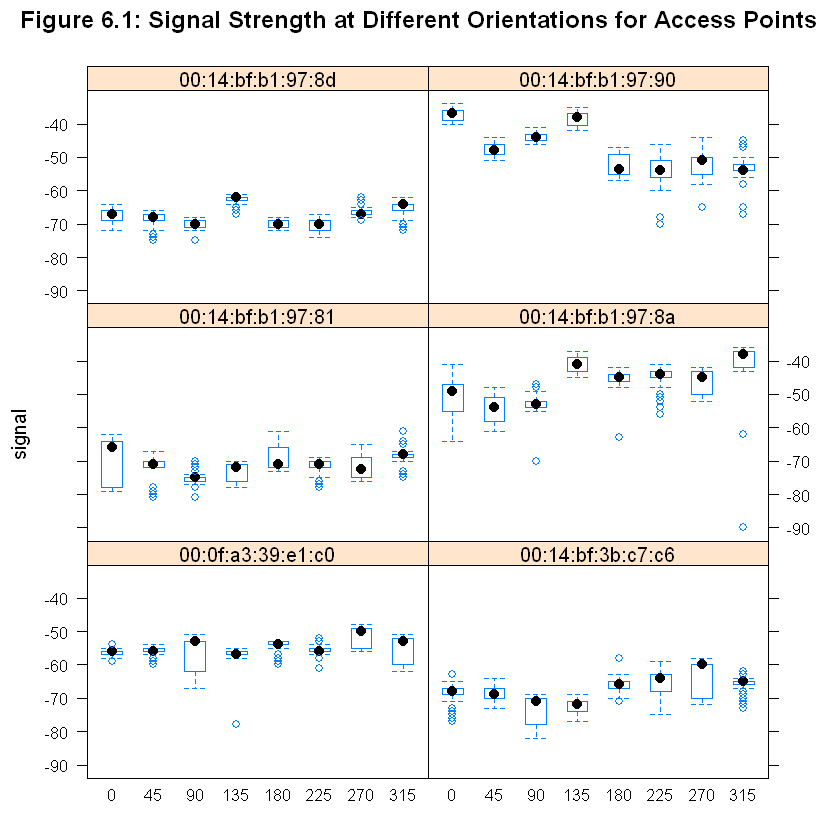

In [33]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar <- par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offline, 
       subset = posX == 2 & posY == 12 
                & mac != "00:0f:a3:39:dd:cd", 
       layout = c(2,3), 
       main = "Figure 6.1: Signal Strength at Different Orientations for Access Points")

par(oldPar)
#dev.off()



In [34]:
summary(offline$signal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -67     -59     -60     -53     -25 

Now, instead of drop 00:0f:a3:39:dd:cd, we drop the 00:0f:a3:39:e1:c0. In this way we can see how the visualization change. 

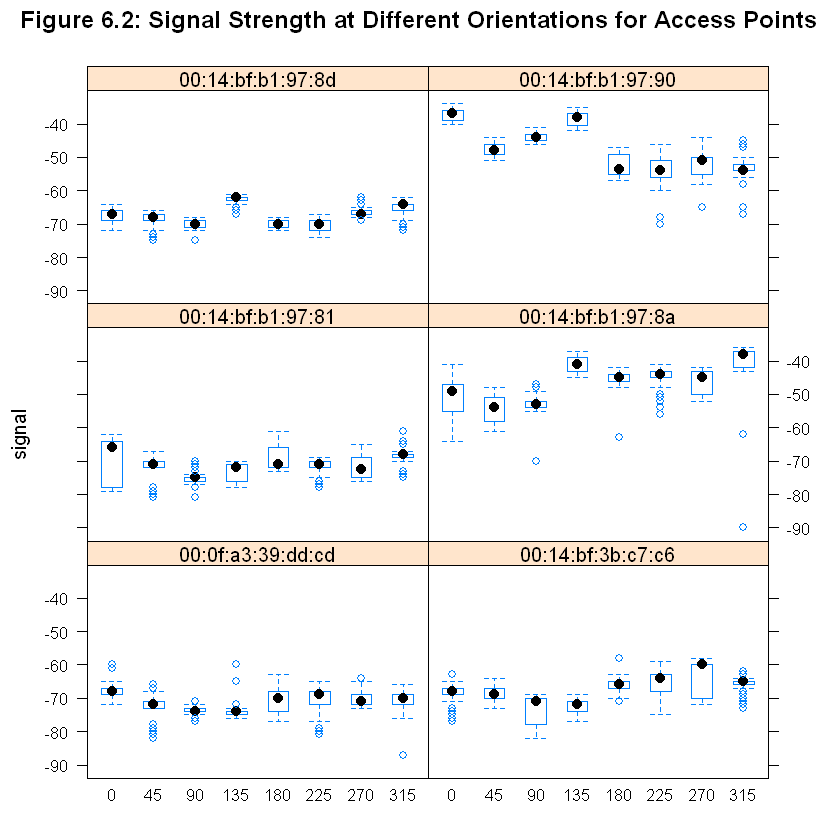

In [35]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar <- par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offline, 
       subset = posX == 2 & posY == 12 
                & mac != "00:0f:a3:39:e1:c0", 
       layout = c(2,3), 
       main = "Figure 6.2: Signal Strength at Different Orientations for Access Points")

par(oldPar)

#dev.off()

Both Figure 2.1 and Figure 2.2 demostrates the distribution of signal strength at different orientations for different access points. But Figure 2.1 dropped 00:0f:a3:39:dd:cd and Figure 2.2 dropped 00:0f:a3:39:e1:c0. As the signal strength varies with the orientation for close and far access points, both of these two points follow the same pattern. 

Now we can check for the strength distribution of them. Figure 3.1 is without 00:0f:a3:39:dd:cd while Figure 3.2 is with the other point. 

According to plots below, many of these distributions looks normal. However some of them have secondary modes and skewness. It is confident to say that the center of the distribution varies with angle and MAC address. This tell us that the condidtiong on angle and MAC address is warranted. 



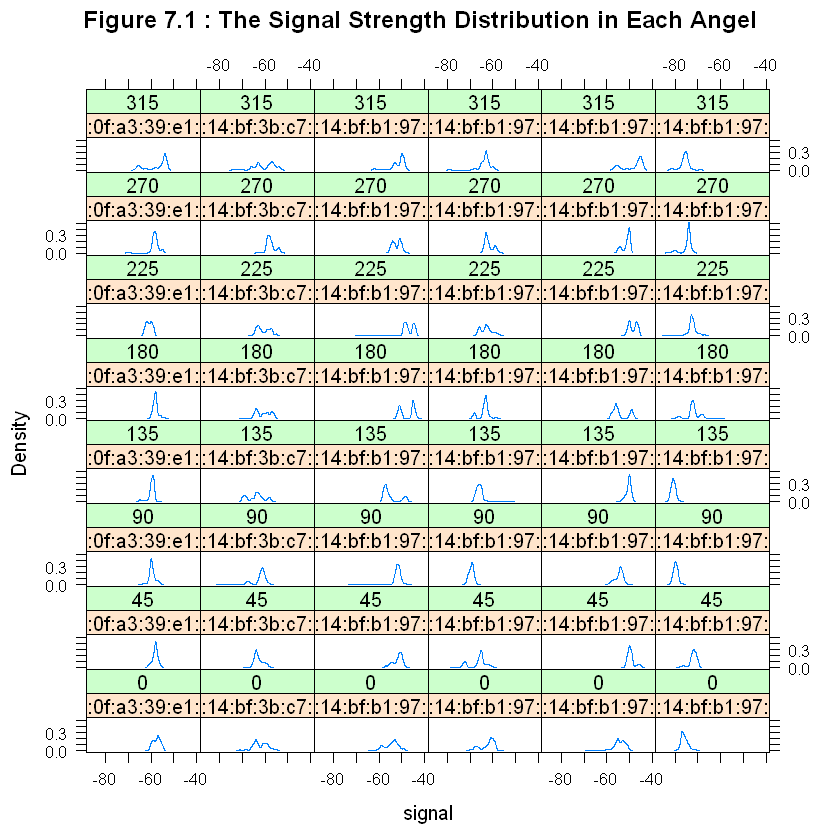

In [36]:
# plot for the signal strength distribution in each angel

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar <- par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offline,
             subset = posX == 24 & posY == 4 & 
                         mac != "00:0f:a3:39:dd:cd",main = "Figure 7.1 : The Signal Strength Distribution in Each Angel",
             bw = 0.5, plot.points = FALSE)

par(oldPar)
#dev.off()

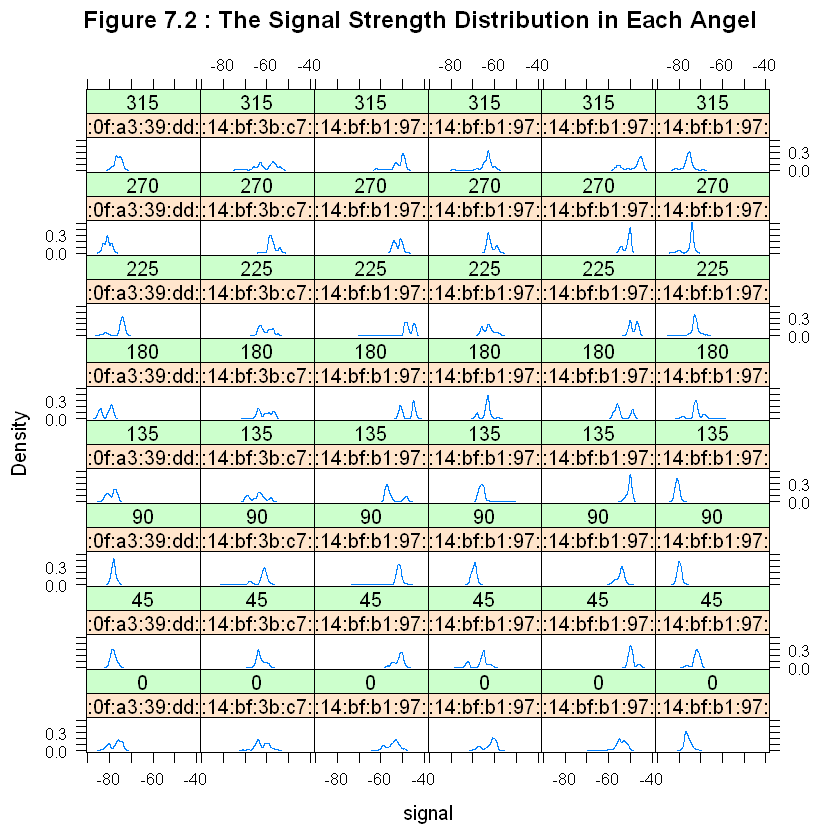

In [37]:
oldPar <- par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offline,
             subset = posX == 24 & posY == 4 & 
                         mac != "00:0f:a3:39:e1:c0",main = "Figure 7.2 : The Signal Strength Distribution in Each Angel",
             bw = 0.5, plot.points = FALSE)

par(oldPar)

In [38]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offline$posXY <- paste(offline$posX, offline$posY, sep = "-")

byLocAngleAP <- with(offline, 
                    by(offline, list(posXY, angle, mac), 
                       function(x) x))

signalSummary <- 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummary <- do.call("rbind", signalSummary) 

### Relationship between the mean of psignal strength and the standard deviation of signal strength.
The following visualization can tell us that if there is a relationship between the mean signal strength and the standard deviation of the signal strength. 

From the plot below, we can definitely tell that there is a relationship and it is quite position as in the mean signal strength increases while the standard deviation of signal strength goes up. The weak signals have low variability and the stronger signals have greater variablity. This is also reasonable when considering the practical situation -- if near the access point, signal will be stronger. 

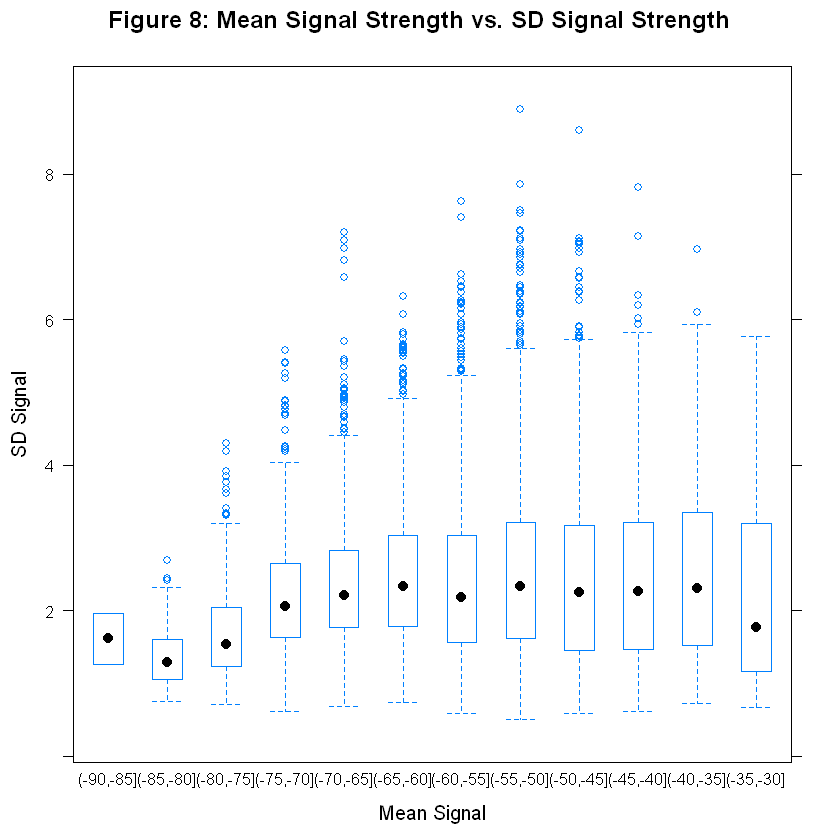

In [39]:

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar <- par(mar = c(3.1, 3, 1, 1))

breaks <- seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummary, 
       subset = mac != "00:0f:a3:39:dd:cd",
       xlab = "Mean Signal", ylab = "SD Signal", main = "Figure 8: Mean Signal Strength vs. SD Signal Strength")
par(oldPar)
#dev.off()

### The Relationship between the mean - median of signal strength and the number of observations.

Heat map below shows the difference between the mean and median signal strength for each combination of location, access point, and angle against the number of observations.The differences are close 0 to 2 dBm. This visaulization is very interesting as in when the number of observation increases, the mean - median value will increase then converge at the interval of the number of observations between 100 and 120.

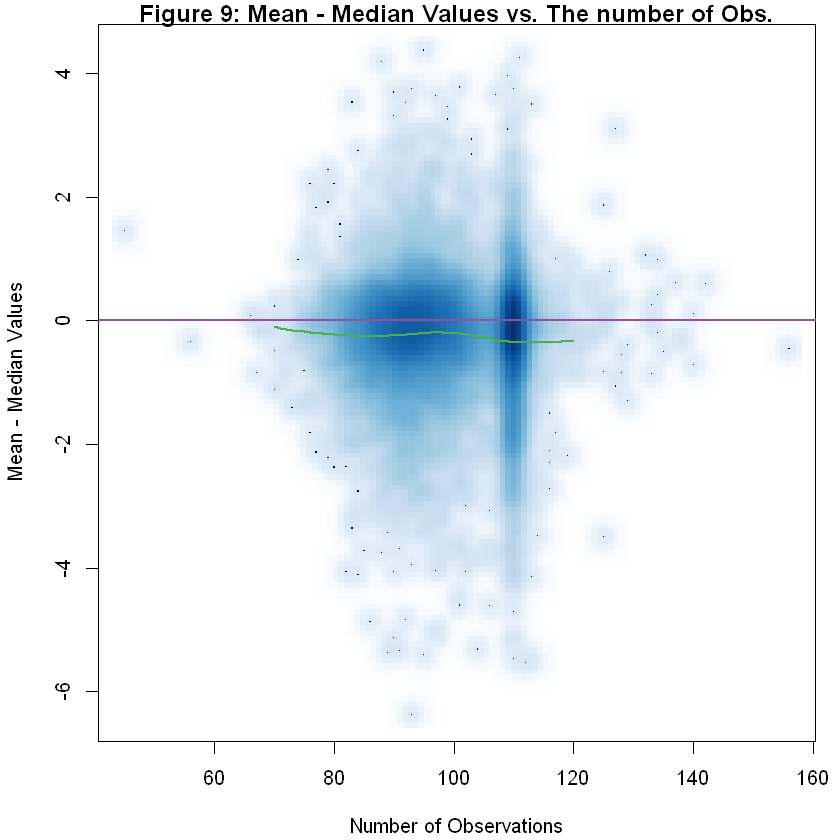

In [40]:
    
#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar <- par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummary, 
     smoothScatter((avgSignal - medSignal) ~ num, 
                   xlab = "Number of Observations", 
                   ylab = "Mean - Median Values", 
                   main = "Figure 9: Mean - Median Values vs. The number of Obs."))
abline(h = 0, col = "#984ea3", lwd = 2)

lo.obj <- 
  with(offlineSummary,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
#dev.off()




Another good way to reflect the relationship between signal strength and distance is to use the countour heatmap. This will tell us a more comprehensive story of the strength and the location of that access point. There is color changing in the heatmap as the distance gets either further or closer. 

In [41]:
# surfaceSS function to find the relationship of the MAC and angle relationship
surfaceSS <- function(data, mac, angle = 45) {
  require(fields)
  oneAPAngle = data[ data$mac == mac & data$angle == angle, ]
  smoothSS = Tps(oneAPAngle[, c("posX","posY")], 
                 oneAPAngle$avgSignal)
  vizSmooth = predictSurface(smoothSS)
  plot.surface(vizSmooth, type = "C", 
               xlab = "", ylab = "", 
               main="Figure 10: Heatmap of MACs and Angles",
               xaxt = "n", yaxt = "n")
  points(oneAPAngle$posX, oneAPAngle$posY, pch=19, cex = 0.5) 
}

In [42]:
subMacs

[1] "00:0f:a3:39:e1:c0" "00:0f:a3:39:dd:cd" "00:14:bf:b1:97:8a"
[4] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:90" "00:14:bf:b1:97:8d"
[7] "00:14:bf:b1:97:81"

The topographic heat map below shows the signal strength in two angels(0,135) for MAC 00:14:bf:b1:97:90 and 00:0f:a3:39:e1:c0. You can clearly see the location of the access point which is in the dark red area in the heat map. You can see how easy we can identify which point is located at what position in Figure 6.1 and Figure 6.2 from above. The MAC address 00:0f:a3:39:e1:c0 has an absolute value of strength between 50 and 60 which tells us it is in the yellowish zone and in the upper part. The 00:14:bf:b1:97:90 point has a strong and wide range of absolute strength starting from 40 which tells us it is located on the upper left corner.

Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 


$`00:14:bf:b1:97:90`
NULL

$`00:14:bf:b1:97:90`
NULL

$`00:0f:a3:39:e1:c0`
NULL

$`00:0f:a3:39:e1:c0`
NULL

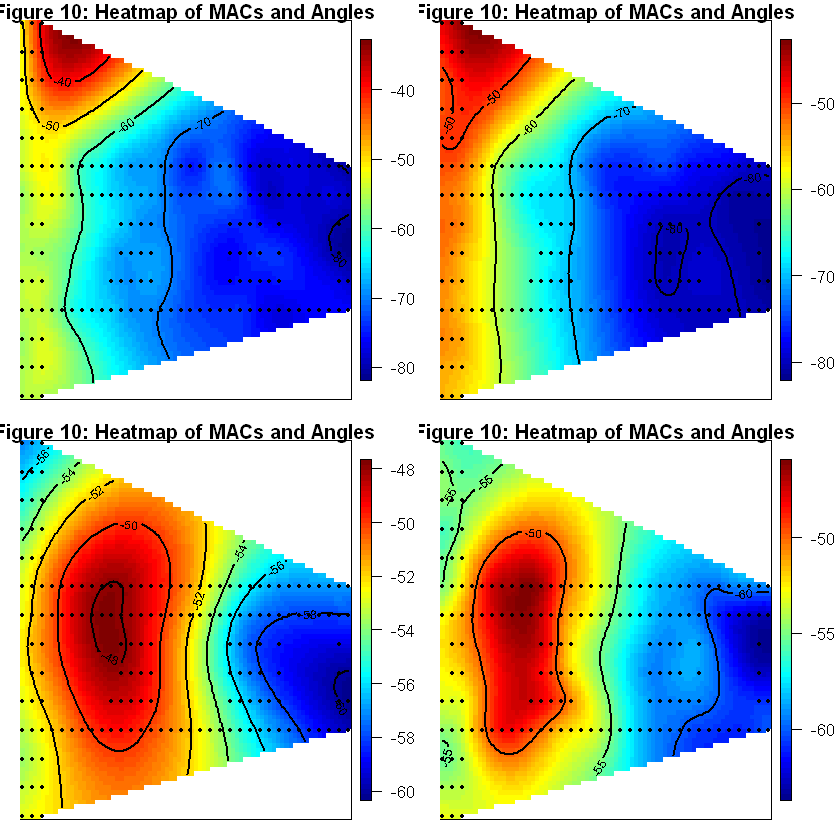

In [43]:
# 2 x 2 plot
parCur <- par(mfrow = c(2,2), mar = rep(1, 4))

mapply(surfaceSS, mac = subMacs[ rep(c(5, 1), each = 2) ], 
       angle = rep(c(0, 135), 2),
       data = list(data = offlineSummary))
 
par(parCur)

In [44]:
# exclude 00:0f:a3:39:dd:cd
offlineSummary <- subset(offlineSummary, mac != subMacs[2])

Now we remove the access point 00:0f:a3:39:dd:cd.

The matrix blow is created based on the topographical heat map for each access point on the top of the floor plan. We decided the first access point 00:0f:a3:39:e1:c0 first (x=7.5, y=6.3) and according to the documentation the training data were mearusred at 1 meter intervals in the building. So we can use the grey dots on the plan to estimate the location of the access points.

The Figure 7 from above indicates that the signal strength is negative correlated with the distance which mean the further the access point is the weaker the signal is. Nolan and Lang provided a scatter plot, see Figure 8 below, so that they can illustrate the relationship between the distance and the signal strength. The following code provides information of the location of each point. This also proves our understanding from above. 00:0f:a3:39:e1:c0	and 00:14:bf:b1:97:90 are in the upper area.



In [45]:

# get the location of the access point.

AP = matrix( c( 7.5, 6.3, 2.5, -.8, 12.8, -2.8,  
                1, 14, 33.5, 9.3,  33.5, 2.8),
            ncol = 2, byrow = TRUE,
            dimnames = list(subMacs[ -2 ], c("x", "y") ))

AP


,x,y
00:0f:a3:39:e1:c0,7.5,6.3
00:14:bf:b1:97:8a,2.5,-0.8
00:14:bf:3b:c7:c6,12.8,-2.8
00:14:bf:b1:97:90,1.0,14.0
00:14:bf:b1:97:8d,33.5,9.3
00:14:bf:b1:97:81,33.5,2.8


In [46]:
# difference from each training point to each access point.
diffs <- offlineSummary[ , c("posX", "posY")] - 
          AP[ offlineSummary$mac, ]

offlineSummary$dist <- sqrt(diffs[ , 1]^2 + diffs[ , 2]^2)


We add a **dist** column to calculate the distance from each training point to the access point. The distance may have inversely proportional relationship with the signal strength.

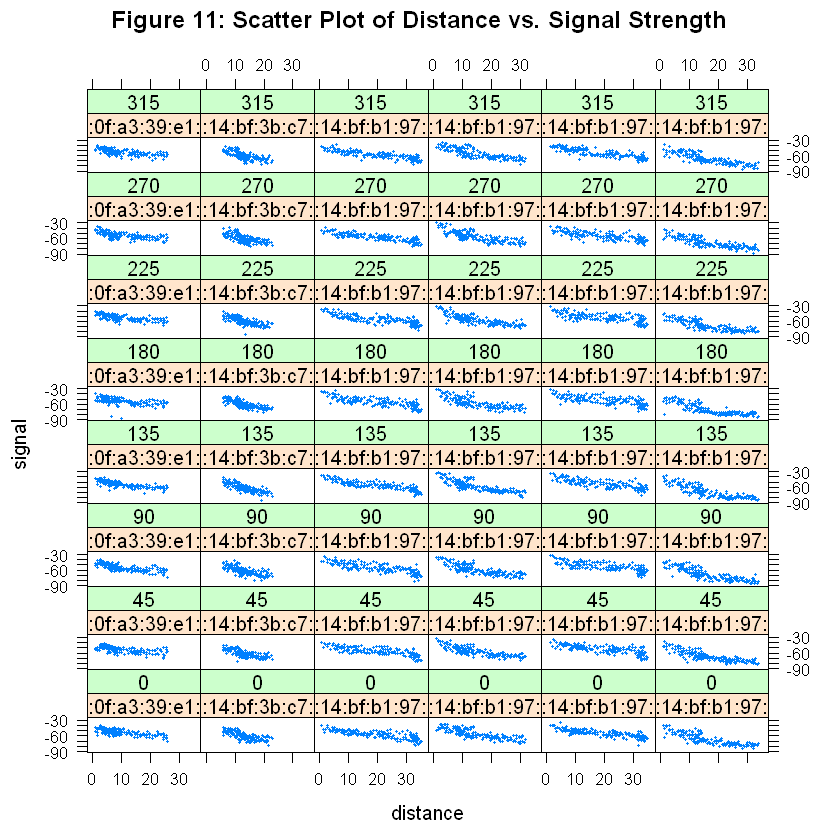

In [47]:

# Plot the relationship between the distance and the signal strength.
#pdf(file="Geo_ScatterSignalDist.pdf", width = 7, height = 10)
oldPar = par(mar = c(3.1, 3.1, 1, 1))
library(lattice)
xyplot(signal ~ dist | factor(mac) + factor(angle), 
       data = offlineSummary, pch = 19, cex = 0.3,
       xlab ="distance",
       main = "Figure 11: Scatter Plot of Distance vs. Signal Strength")
par(oldPar)
#dev.off()



## Build Model to Predict Location

### Prepare the Test Data

In [48]:
# Import and organize the data
macs <- unique(offlineSummary$mac)
online <- readData("Data/online.final.trace.txt", subMacs = macs)
# create unique identifier for location
online$posXY <- paste(online$posX, online$posY, sep = "-")
# unique number of locations
length(unique(online$posXY))

tabonlineXYA <- table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars <- c("posXY", "posX","posY", "orientation", "angle")
byLoc <- with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))
# confirm the data set
onlineSummary <- do.call("rbind", byLoc)  

dim(onlineSummary)
names(onlineSummary)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 593   0   0   0   0
  0.15-9.42    0   0 606   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 573   0   0
  0.47-8.2   590   0   0   0   0   0   0   0
  0.78-10.94 586   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 583   0   0   0

[1] 60 11

[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:e1:c0"
 [7] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a"
[10] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

### Choice of Orientation

In [49]:
# Pick up the nearest angle.
m <- 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles <- seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m <- m + 1
  angles <- seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles <- angles[ -1 ]
  else 
    angles <- angles[ -m ]
}
angles <- angles + nearestAngle
angles[angles < 0] <- angles[ angles < 0 ] + 360
angles[angles > 360] <- angles[ angles > 360 ] - 360

offlineSubset <- 
  offlineSummary[ offlineSummary$angle %in% angles, ]

In [50]:

# function to aggregate the signal strengths from the angels and create a data structure.
reshapeSS <- function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation <-
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS <- do.call("rbind", byLocation)
  return(newDataSS)
}


In [51]:
# function to get the average of the signal strengths for the different angles 
# to produce one set of signal strengths for each of the 166 locations in the training data
selectTrain <- function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs <- seq(0, by = 45, length  = 8)
  nearestAngle <- roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles <- seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m <- m + 1
    angles <- seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles <- angles[ -1 ]
    else 
      angles <- angles[ -m ]
  }
  angles <- angles + nearestAngle
  angles[angles < 0] <- angles[ angles < 0 ] + 360
  angles[angles > 360] <- angles[ angles > 360 ] - 360
  angles <- sort(angles) 
  
  offlineSubset <- signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

This approach below is to use the selecTrain fuction to find the nearest access point base on the signal strengths.

In [52]:


train130 = selectTrain(130, offlineSummary, m = 3)

head(train130)

length(train130[[1]])



,posXY,posX,posY,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-52,-66,-63,-36,-64,-55
0-1,0-1,0,1,-53,-65,-64,-39,-65,-59
0-10,0-10,0,10,-56,-66,-69,-45,-67,-50
0-11,0-11,0,11,-55,-67,-70,-48,-67,-55
0-12,0-12,0,12,-56,-70,-72,-45,-67,-50
0-13,0-13,0,13,-55,-71,-73,-43,-69,-54


[1] 166

### Find the Nearest Neighbors

The case study provided by Nolan and Lang provided a simple KNN algorithm to prediction a new location. Clustering is quite subjective and the number of neighbors being assigned will directly affect the performance of the algorithm. That is the reason why the numbers of neighbors in a kNN model is so important and should be adjusted to either improve underfitting or reduce overfitting.

In the following process, there are two numbers of neighbors we have picked. 
 * One neighbor only, which could mean that the nearest neighbor(tag) is the prediction of the new device's position. 
 * Three neighbors, which means the average of these three coordinates will the the prediction.

In [53]:
# function to calculate the distance from the test data to all of the training data and get the top 3 nearest.
findNN <- function(newSignal, trainSubset) {
  diffs <- apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists <- apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest <- order(dists)
  return(trainSubset[closest, 1:3 ])
}

# function to get the estimate location 
predXY <- function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY <- list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] <- 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY <- lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY <- do.call("rbind", estXY)
  return(estXY)
}

In [54]:
# two kinds of neighbors
estXYk3 <- predXY(newSignals = onlineSummary[ , 6:11], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 3)

estXYk1 <- predXY(newSignals = onlineSummary[ , 6:11], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 1)

In [55]:
# floor error map
floorErrorMap <- function(estXY, actualXY, trainPoints = NULL, AP = NULL){
  
    plot(0, 0, xlim = c(0, 35), ylim = c(-3, 15), type = "n",
         xlab = "", ylab = "", axes = FALSE)
    box()
    if ( !is.null(AP) ) points(AP, pch = 15)
    if ( !is.null(trainPoints) )
      points(trainPoints, pch = 19, col="grey", cex = 0.6)
    
    points(x = actualXY[, 1], y = actualXY[, 2], 
           pch = 19, cex = 0.8 )
    points(x = estXY[, 1], y = estXY[, 2], 
           pch = 8, cex = 0.8 )
    segments(x0 = estXY[, 1], y0 = estXY[, 2],
             x1 = actualXY[, 1], y1 = actualXY[ , 2],
             lwd = 2, col = "red")
}

In [56]:
trainPoints <- offlineSummary[ offlineSummary$angle == 0 & 
                              offlineSummary$mac == "00:0f:a3:39:e1:c0" ,
                        c("posX", "posY")]


The following two visualizations are with different number of neighbors. The first one is with only one neighbor and the second will be with three neighbors. Both plots show the prediction and the actual position. In the first plot with only one neighbor, we have noticed that the nearest neighbor is not being used as a prediction as we thought it would be. The reason of this could be similarity of the signal strength. This could possibly makes the prediction with K=1 harder and less accurate. We will find out the accuracy and compare them later on.

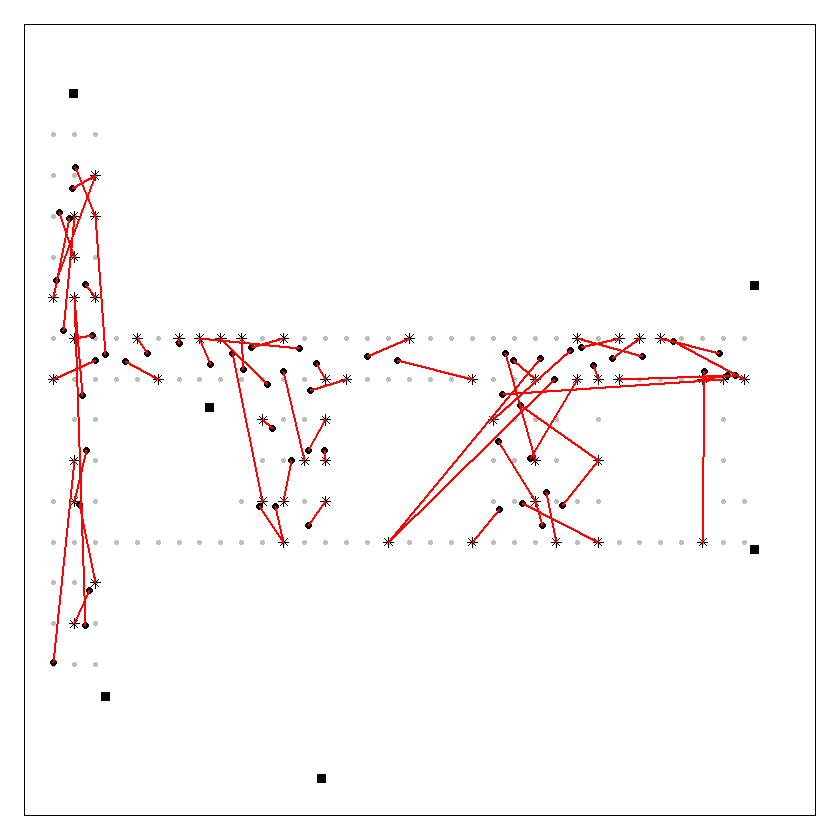

In [57]:

#pdf(file="GEO_FloorPlanK1Errors.pdf", width = 10, height = 7)
oldPar = par(mar = c(1, 1, 1, 1))
floorErrorMap(estXYk1, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)
par(oldPar)
#dev.off()

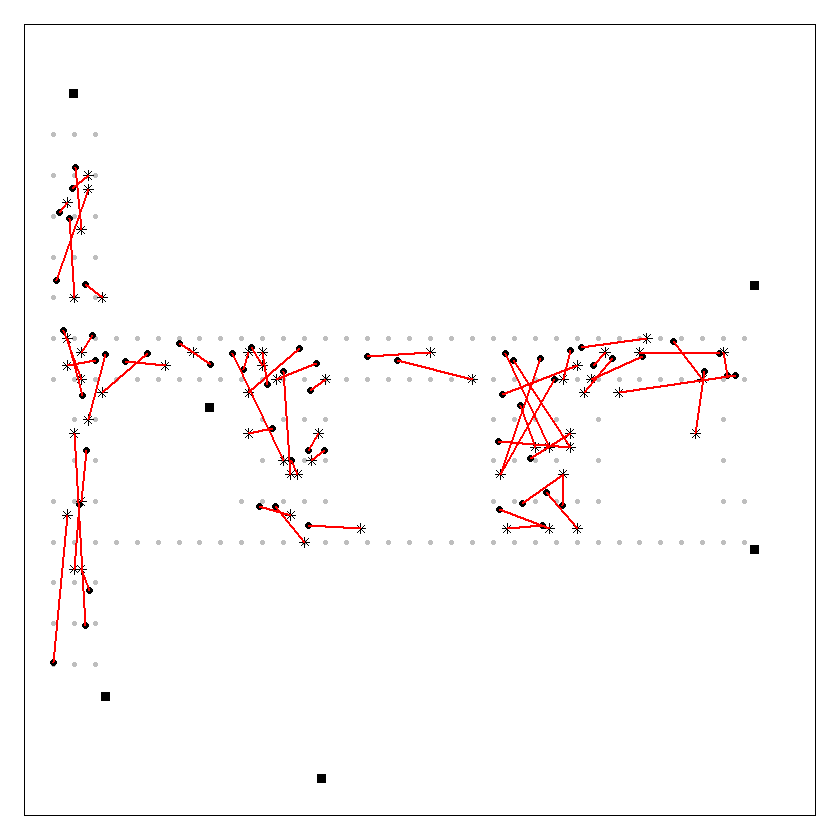

In [58]:
#pdf(file="GEO_FloorPlanK3Errors.pdf", width = 10, height = 7)
oldPar <- par(mar = c(1, 1, 1, 1))
floorErrorMap(estXYk3, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)
par(oldPar)
#dev.off()

Continue with our theory from above, accuracy comparison in terms of the sum of squared error proves that KNN with one neighbor does have a higher SSE and that means less accuracy. 

In [59]:
calcError <- function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

    actualXY <-  onlineSummary[ , c("posX", "posY")]
    sapply(list(estXYk1, estXYk3), calcError, actualXY)
    v <-  11
    permuteLocs <-  sample(unique(offlineSummary$posXY))
    permuteLocs <-  matrix(permuteLocs, ncol = v, 
                         nrow = floor(length(permuteLocs)/v))

    onlineFold <-  subset(offlineSummary, posXY %in% permuteLocs[ , 1])

    reshapeSS <-  function(data, varSignal = "signal", 
                         keepVars = c("posXY", "posX","posY"),
                         sampleAngle = FALSE, 
                         refs = seq(0, 315, by = 45)) {
    byLocation <- 
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

    newDataSS <-  do.call("rbind", byLocation)
    return(newDataSS)
}

[1] 659 307

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
"data length [166] is not a sub-multiple or multiple of the number of rows [15]"

* Question 3: Does using data for both MAC addresses simultaneously yield more, or less, accurate prediction of location?

If we use the KNN algorithm with three neighbors, we can see the calculated sum of the squared error decreases. This indicates that the algorithm actually improves if we do not include the 00:0f:a3:39:dd:cd.

In [60]:


offline <- offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

keepVars <- c("posXY", "posX","posY", "orientation", "angle")

onlineCVSummary <- reshapeSS(offline, keepVars = keepVars, 
                            sampleAngle = TRUE)

onlineFold <- subset(onlineCVSummary, 
                    posXY %in% permuteLocs[ , 1])

offlineFold <- subset(offlineSummary,
                     posXY %in% permuteLocs[ , -1])

estFold <- predXY(newSignals = onlineFold[ , 6:11], 
                 newAngles = onlineFold[ , 4], 
                 offlineFold, numAngles = 3, k = 3)

actualFold <- onlineFold[ , c("posX", "posY")]
calcError(estFold, actualFold)

[1] 148

In [61]:
K <- 4
err <- rep(0, K)

for (j in 1:v) {
  onlineFold <- subset(onlineCVSummary, 
                      posXY %in% permuteLocs[ , j])
  offlineFold <- subset(offlineSummary,
                       posXY %in% permuteLocs[ , -j])
  actualFold <- onlineFold[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFold <- predXY(newSignals = onlineFold[ , 6:11],
                     newAngles = onlineFold[ , 4], 
                     offlineFold, numAngles = 3, k = k)
    err[k] <- err[k] + calcError(estFold, actualFold)
  }
}

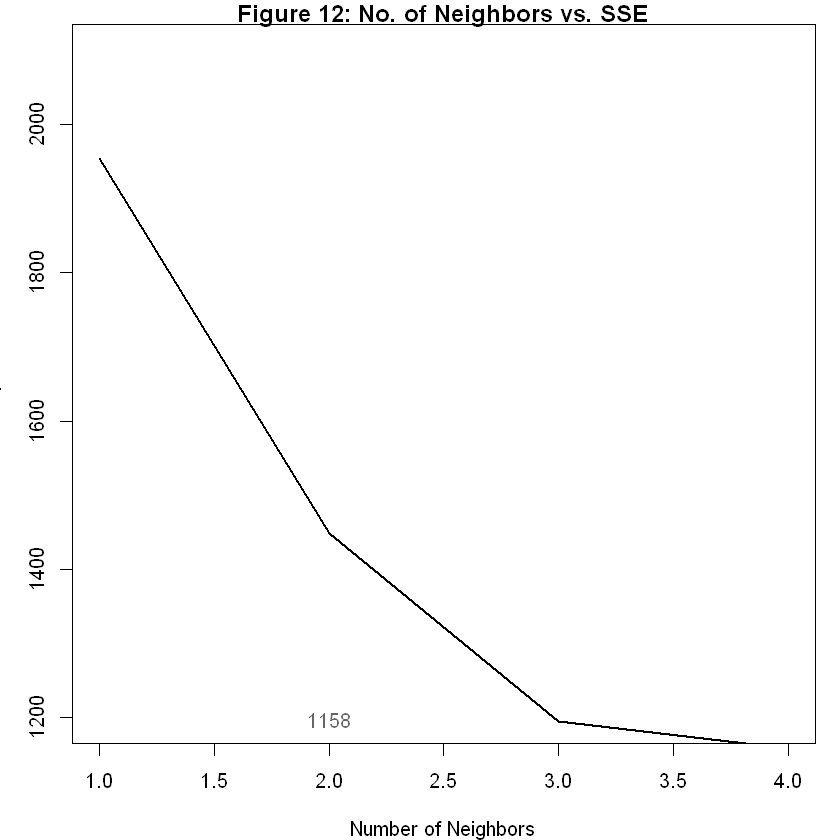

In [62]:

#pdf(file = "Geo_CVChoiceOfK.pdf", width = 10, height = 6)
oldPar <- par(mar = c(4, 3, 1, 1))
plot(y <- err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(1200, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors",
     main= "Figure 12: No. of Neighbors vs. SSE")

rmseMin <- min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)

#mtext(kMin, side = 1, line = 1, at = kMin, col = grey(0.4))
text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))
par(oldPar)
#dev.off()

In [63]:

estXYk5 <- predXY(newSignals = onlineSummary[ , 6:11], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 5)

calcError(estXYk5, actualXY)

predXY <- function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY <- list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = findNN(newSignal = as.numeric(newSignals[i, ]),
                           trainSS)
  }

  estXY <- lapply(closeXY, function(x)
                            sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY <- do.call("rbind", estXY)
  return(estXY)
}

[1] 276

### Conclusion(Iram)

### Reference(Iram)
